# Ensemble Technique: Bagging and Boosting Project 4 - Travel Package Purhase
## Paige Singleton
## August 2022

## Problem Statement
### A company "Visit with us" wants to "enable and establish a viable business model to expand the customer base.

- Given customer data, "analyze the customers' data and information to provide recommendations to the Policy Maker and build a model to predict the potential customer who is going to purchase the newly introduced travel package. The model will be built to make predictions before a customer is contacted."

## Data Dictionary

### Customer details:
- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 
- PitchSatisfactionScore: Sales pitch satisfaction score
- ProductPitched: Product pitched by the salesperson
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
- DurationOfPitch: Duration of the pitch by a salesperson to the customer


## Section 1: Perform an Exploratory Data Analysis on the data
- Univariate Analysis
- Bivariate Analysis
- Customer Profile (with at least 3 points to distinguish features for each package)
    - Basic
    - Standard
    - Deluxe
    - Super Deluxe
    - King
- Exploratory Deep Dive

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Tourism.csv")
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
# Display 10 random rows
np.random.seed(1)
data.sample(n=10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3015,203015,0,27.0,Company Invited,1,7.0,Salaried,Female,4,6.0,Basic,3.0,Married,5.0,0,4,1,3.0,Executive,23042.0
1242,201242,0,40.0,Self Enquiry,3,13.0,Small Business,Male,2,3.0,King,4.0,Single,2.0,0,4,1,NaN,VP,34833.0
3073,203073,0,29.0,Self Enquiry,2,15.0,Small Business,Male,4,5.0,Basic,3.0,Married,3.0,0,2,0,2.0,Executive,23614.0
804,200804,0,48.0,Company Invited,1,6.0,Small Business,Male,2,1.0,Super Deluxe,3.0,Single,3.0,0,2,0,0.0,AVP,31885.0
3339,203339,0,32.0,Self Enquiry,1,18.0,Small Business,Male,4,4.0,Deluxe,5.0,Divorced,3.0,1,2,0,3.0,Manager,25511.0
3080,203080,1,36.0,Company Invited,1,32.0,Salaried,Female,4,4.0,Basic,4.0,Married,3.0,1,3,0,1.0,Executive,20700.0
2851,202851,0,46.0,Self Enquiry,1,17.0,Salaried,Male,4,4.0,Basic,3.0,Divorced,5.0,0,5,1,1.0,Executive,21332.0
2883,202883,1,32.0,Company Invited,1,27.0,Salaried,Male,4,4.0,Standard,3.0,Divorced,5.0,0,3,1,1.0,Senior Manager,28502.0
1676,201676,0,22.0,Self Enquiry,1,11.0,Salaried,Male,2,1.0,Basic,4.0,Married,2.0,1,4,1,0.0,Executive,17328.0
1140,201140,0,44.0,Self Enquiry,1,13.0,Small Business,Female,2,3.0,King,3.0,Married,1.0,1,4,1,1.0,VP,34049.0


In [4]:
#Understand tha overall dataset structure and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
#Designate initial categorical columns and numerical columns,
cat_cols = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
num_cols = ['CustomerID','ProdTaken','Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']

In [6]:
# of rows and columns
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.') 

There are 4888 rows and 20 columns.


In [7]:
# Check for null values in dataset
data.isnull().sum()


CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [8]:
#Calculate descrition statistics for numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [9]:
# Understand the number of unique values in each column
data.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [10]:
#Check for duplicates
data[data.duplicated()].count()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [11]:
#Understand the number of each type for the following columns: 
for col in cat_cols:
    print(data[col].value_counts())
    print("_________________________________")

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
_________________________________
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
_________________________________
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
_________________________________
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
_________________________________
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
_________________________________
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
_________________________________


### Initial Observations 

### Customer details:
- CustomerID: Unique customer I
    - this variable will not inform the model and should be dropped from clean dataset
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    - This variable is currently an integer dtype;
    - 2 unique values
    - no nulls
- Age: Age of customer
    - Min:18; Max:61; Mean:37;Median:36; data is likely not skewed right or left
    - 226 null values therefore explore imputation
    - 44 unique values
    - dtppe is float
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    - Object dtype; change to category
    - 2 unique counts 
    - 25 nulls therefore explore null imputation
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
    - 3 unique values;
    - dtype is integer;
- Occupation: Occupation of customer
    - 4 unique values; object dtype
    - change dtype to category and get dummy variables 
    - no nulls
- Gender: Gender of customer
    - Gender has 3 unique values (Male, Female and Fe Male);
    - All 'Fe Male' values (155 values) needs to be changed to 'Female'
    - Object dtype needs to change to category and get dummy variables
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    - no nulls
    - unique count = 5
    - dtype is integer;
- PreferredPropertyStar: Preferred hotel property rating by customer
    - 26 nulls
    - 3 unique values
    - float64 dtype (could change to integer)
    - min:3.0; max:5.0; median: 3.0; mean: 3.78; data is skewed right 
- MaritalStatus: Marital status of customer
    - no nulls
    - object dtype with 4 unique values(married, divorced, single, unmarried)
    - Single and Unmarried represent same idea therefore combine these into one unique value 'single'
- NumberOfTrips: Average number of trips in a year by customer
    - missing 140 values
    - number of unique values: 12
    - min:1.0; max:22; median:3.0; mean:3.23
    - probable outliers
- Passport: The customer has a passport or not (0: No, 1: Yes)
    - int64 dtype
    - number of unique values:2
    - no nulls 
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    - int64 dtype
    - no nulls
    - 2 unique values
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    - float64 dtype
    - 66 nulls
    - 4 unique values
- Designation: Designation of the customer in the current organization
    - object dtype (change to category)
    - no nulls
    - 5 unique values
- MonthlyIncome: Gross monthly income of the customer
    - dtype float64
    - min:1000; max:98678; median:22347; mean:23620
    - 233 nulls

### Customer interaction data: 
- PitchSatisfactionScore: Sales pitch satisfaction score
    - no nulls
    - dtype int64
    - min:1.0; max:5.0; median:3.0; mean:3.08
    - 5 unique values
- ProductPitched: Product pitched by the salesperson
    - object dtype (change to category) and get dummy variables
    - 5 unique variables
    - no nulls
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
    - float64 dtype
    - 45 nulls
    - min:1.0; max:6.0; median:4.0; mean:3.71; 
    - 6 unique values
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
    - float64 dtype
    - 45 nulls
    - min:5.0; max:127.0; median:13.0; mean; 15.49
    - 34 unique values
    - possible outliers

### Univariate Analysis


In [12]:
# From Anime Rating Prediction case study, function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Variable - 'ProdTaken' Analysis 

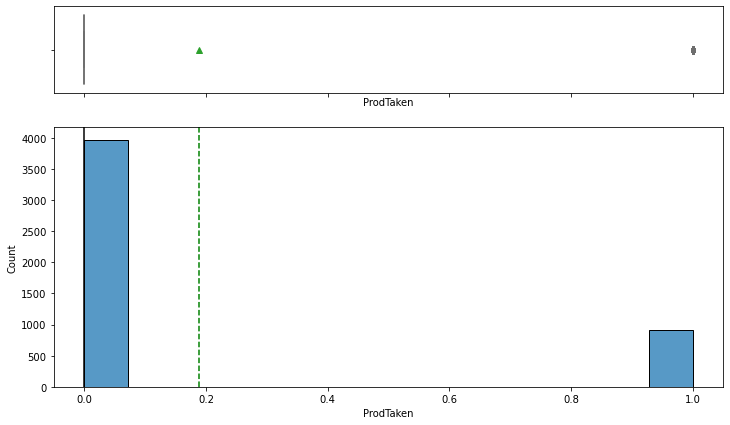

In [13]:

histogram_boxplot(data, "ProdTaken")


#### Insights - ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    - approximately a 4 to 1 ratio of 0(No) to 1(Yes)
    - This variable will be the target valriable for the model
    - no nulls therefore this variable is ready for model build

#### Variable - 'Age' Analysis 

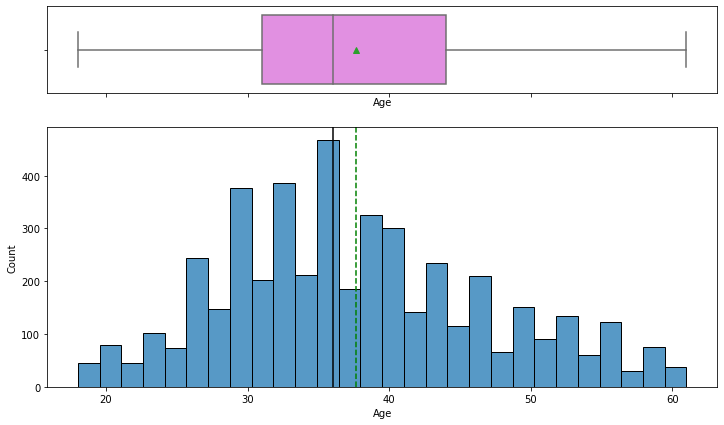

In [14]:
histogram_boxplot(data, "Age")

In [15]:
ProdByAge = data.groupby(['ProductPitched'])['Age'].median()
ProdByAge

ProductPitched
Basic           32.0
Deluxe          36.0
King            49.0
Standard        38.0
Super Deluxe    49.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='ProductPitched'>

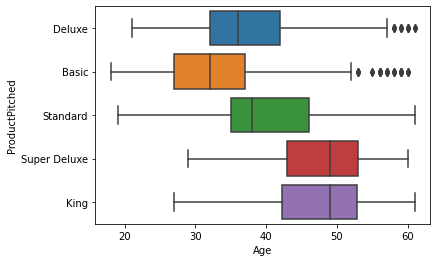

In [16]:
sns.boxplot(data = data, x='Age',y='ProductPitched')

In [17]:
data.groupby(['ProductPitched'])['Age'].count()

ProductPitched
Basic           1698
Deluxe          1651
King             230
Standard         741
Super Deluxe     342
Name: Age, dtype: int64

In [18]:
#Impute 'Age' null values with median of Product Pitched group membership - (https://medium.com/analytics-vidhya/best-way-to-impute-categorical-data-using-groupby-mean-mode-2dc5f5d4e12d)
data['Age'] = data.groupby(['ProductPitched'], sort=False)['Age'].apply(lambda x: x.fillna(x.median()))

data['Age'].isnull().sum()

0

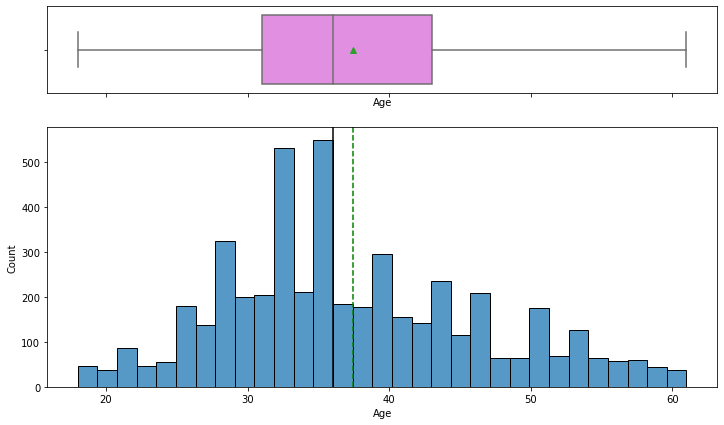

In [19]:
#Review boxplot and histogram to check new distribution
histogram_boxplot(data, "Age")

#### Insights - 'Age'
    - Min:18; Max:61; Mean:37;Median:36; data is likely not skewed right or left
    - Data Distribution is ready for model build (appears somewhat normal)
    - 226 null values imputed with Median of product Pitched group membership
    - As age increases, customers appear to be pitched products in this order: Basic, Deluxe, standard, King, Super Deluxe

#### Variable 'Type of Contact' Analysis

In [30]:
data.groupby(['TypeofContact'])['CustomerID'].count()/len(data)*100


TypeofContact
Company Invited    29.030278
Self Enquiry       70.969722
Name: CustomerID, dtype: float64

In [31]:
data.groupby(['TypeofContact'])['CustomerID'].count()

TypeofContact
Company Invited    1419
Self Enquiry       3469
Name: CustomerID, dtype: int64

In [21]:
data.groupby(['TypeofContact'])['ProductPitched'].value_counts()

TypeofContact    ProductPitched
Company Invited  Deluxe             541
                 Basic              516
                 Standard           218
                 Super Deluxe        96
                 King                48
Self Enquiry     Basic             1316
                 Deluxe            1176
                 Standard           524
                 Super Deluxe       246
                 King               182
Name: ProductPitched, dtype: int64

In [22]:
data['TypeofContact'].isnull().sum()

25

In [23]:
data['TypeofContact']=data.groupby(['ProductPitched'], sort=False)['TypeofContact'].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [24]:
data['TypeofContact'].isnull().sum()

0

In [25]:
data.groupby(['TypeofContact'])['ProductPitched'].value_counts()

TypeofContact    ProductPitched
Company Invited  Deluxe             541
                 Basic              516
                 Standard           218
                 Super Deluxe        96
                 King                48
Self Enquiry     Basic             1326
                 Deluxe            1191
                 Standard           524
                 Super Deluxe       246
                 King               182
Name: ProductPitched, dtype: int64

#### Insights - 'TypeofCustomer'
- 25 null values imputed with mode given Product Pitched
- Customers who self-inquiry (71%) outnumber customers (29%) who are invited by the company
- Both types of customers are initially pitched Basic and Deluxe products (although self-inquiry are pitched slightly more Basic than Deluxe and vice versa for company invited)


In [ ]:
#### Variable 

## Section 2: EDA Insights

#### Customer details
- CustomerID: Unique customer I
    - Column will be dropped for model build
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
    - approximately a 4 to 1 ratio of 0(No) to 1(Yes)
    - This variable will be the target valriable for the model
    - no nulls therefore this variable is ready for model build
- Age: Age of customer
    - Min:18; Max:61; Mean:37;Median:36; data is likely not skewed right or left
    - Data Distribution is ready for model build (appears somewhat normal)
    - 226 null values imputed with Median of product Pitched group membership
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
    - 25 null values imputed with mode given Product Pitched
    - Customers who self-inquiry (71%) outnumber customers (29%) who are invited by the company
    - Both types of customers are initially pitched Basic and Deluxe products (although self-inquiry are pitched slightly more Basic than Deluxe and vice versa for company invited)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3. It's the city the customer lives in.
    - 3 unique values;
    - no nulls
    - dtype is integer;
- Occupation: Occupation of customer
    - 4 unique values; object dtype
    - change dtype to category and get dummy variables 
    - no nulls
- Gender: Gender of customer
    - Gender has 3 unique values (Male, Female and Fe Male);
    - All 'Fe Male' values (155 values) needs to be changed to 'Female'
    - Object dtype needs to change to category and get dummy variables
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
    - no nulls
    - unique count = 5
    - dtype is integer;
- PreferredPropertyStar: Preferred hotel property rating by customer
    - 26 nulls
    - 3 unique values
    - float64 dtype (could change to integer)
    - min:3.0; max:5.0; median: 3.0; mean: 3.78; data is skewed right 
- MaritalStatus: Marital status of customer
    - no nulls
    - object dtype with 4 unique values(married, divorced, single, unmarried)
    - Single and Unmarried represent same idea therefore combine these into one unique value 'single'
- NumberOfTrips: Average number of trips in a year by customer
    - missing 140 values
    - number of unique values: 12
    - min:1.0; max:22; median:3.0; mean:3.23
    - probable outliers
- Passport: The customer has a passport or not (0: No, 1: Yes)
    - int64 dtype
    - number of unique values:2
    - no nulls 
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
    - int64 dtype
    - no nulls
    - 2 unique values
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
    - float64 dtype
    - 66 nulls
    - 4 unique values
- Designation: Designation of the customer in the current organization
    - object dtype (change to category)
    - no nulls
    - 5 unique values
- MonthlyIncome: Gross monthly income of the customer
    - dtype float64
    - min:1000; max:98678; median:22347; mean:23620
    - 233 nulls

### Customer interaction data: 
- PitchSatisfactionScore: Sales pitch satisfaction score
    - no nulls
    - dtype int64
    - min:1.0; max:5.0; median:3.0; mean:3.08
    - 5 unique values
- ProductPitched: Product pitched by the salesperson
    - object dtype (change to category) and get dummy variables
    - 5 unique variables
    - no nulls
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
    - float64 dtype
    - 45 nulls
    - min:1.0; max:6.0; median:4.0; mean:3.71; 
    - 6 unique values
- DurationOfPitch: Duration of the pitch by a salesperson to the customer
    - float64 dtype
    - 45 nulls
    - min:5.0; max:127.0; median:13.0; mean; 15.49
    - 34 unique values
    - possible outliers

## Section 3: Data Pre-processing
- Missing Value treatment
- Outlier detection, if needed
- Feature Engineering
- Data Preparation


## Section 4: Model Building - Bagging
- Build Bagging classifier
- Random Forest
- Decision Tree
- Model Performance

## Section 5: Model Performance Improvement - Bagging
- Model performance metric
- Model performance after tuning the Decision Tree, Bagging and Randon Forest classifier

## Section 6: Model building - Boosting
- Adaboost, GradientBoost, XGBoost and Stacking classifiers
- Model Performance

## Section 7: Model Performance Improvement - Boosting
- Model performance metric
- Model performance after tuning the AdaBoost and Gradient Boosting classifier

NOTE: XGBoost will increase runtime

## Section 8: Actionable Insights and Recommendation
- Model performance on various insights comparison
- Key Takeaways
- Advice for establishing a viable business model to expand the customer base